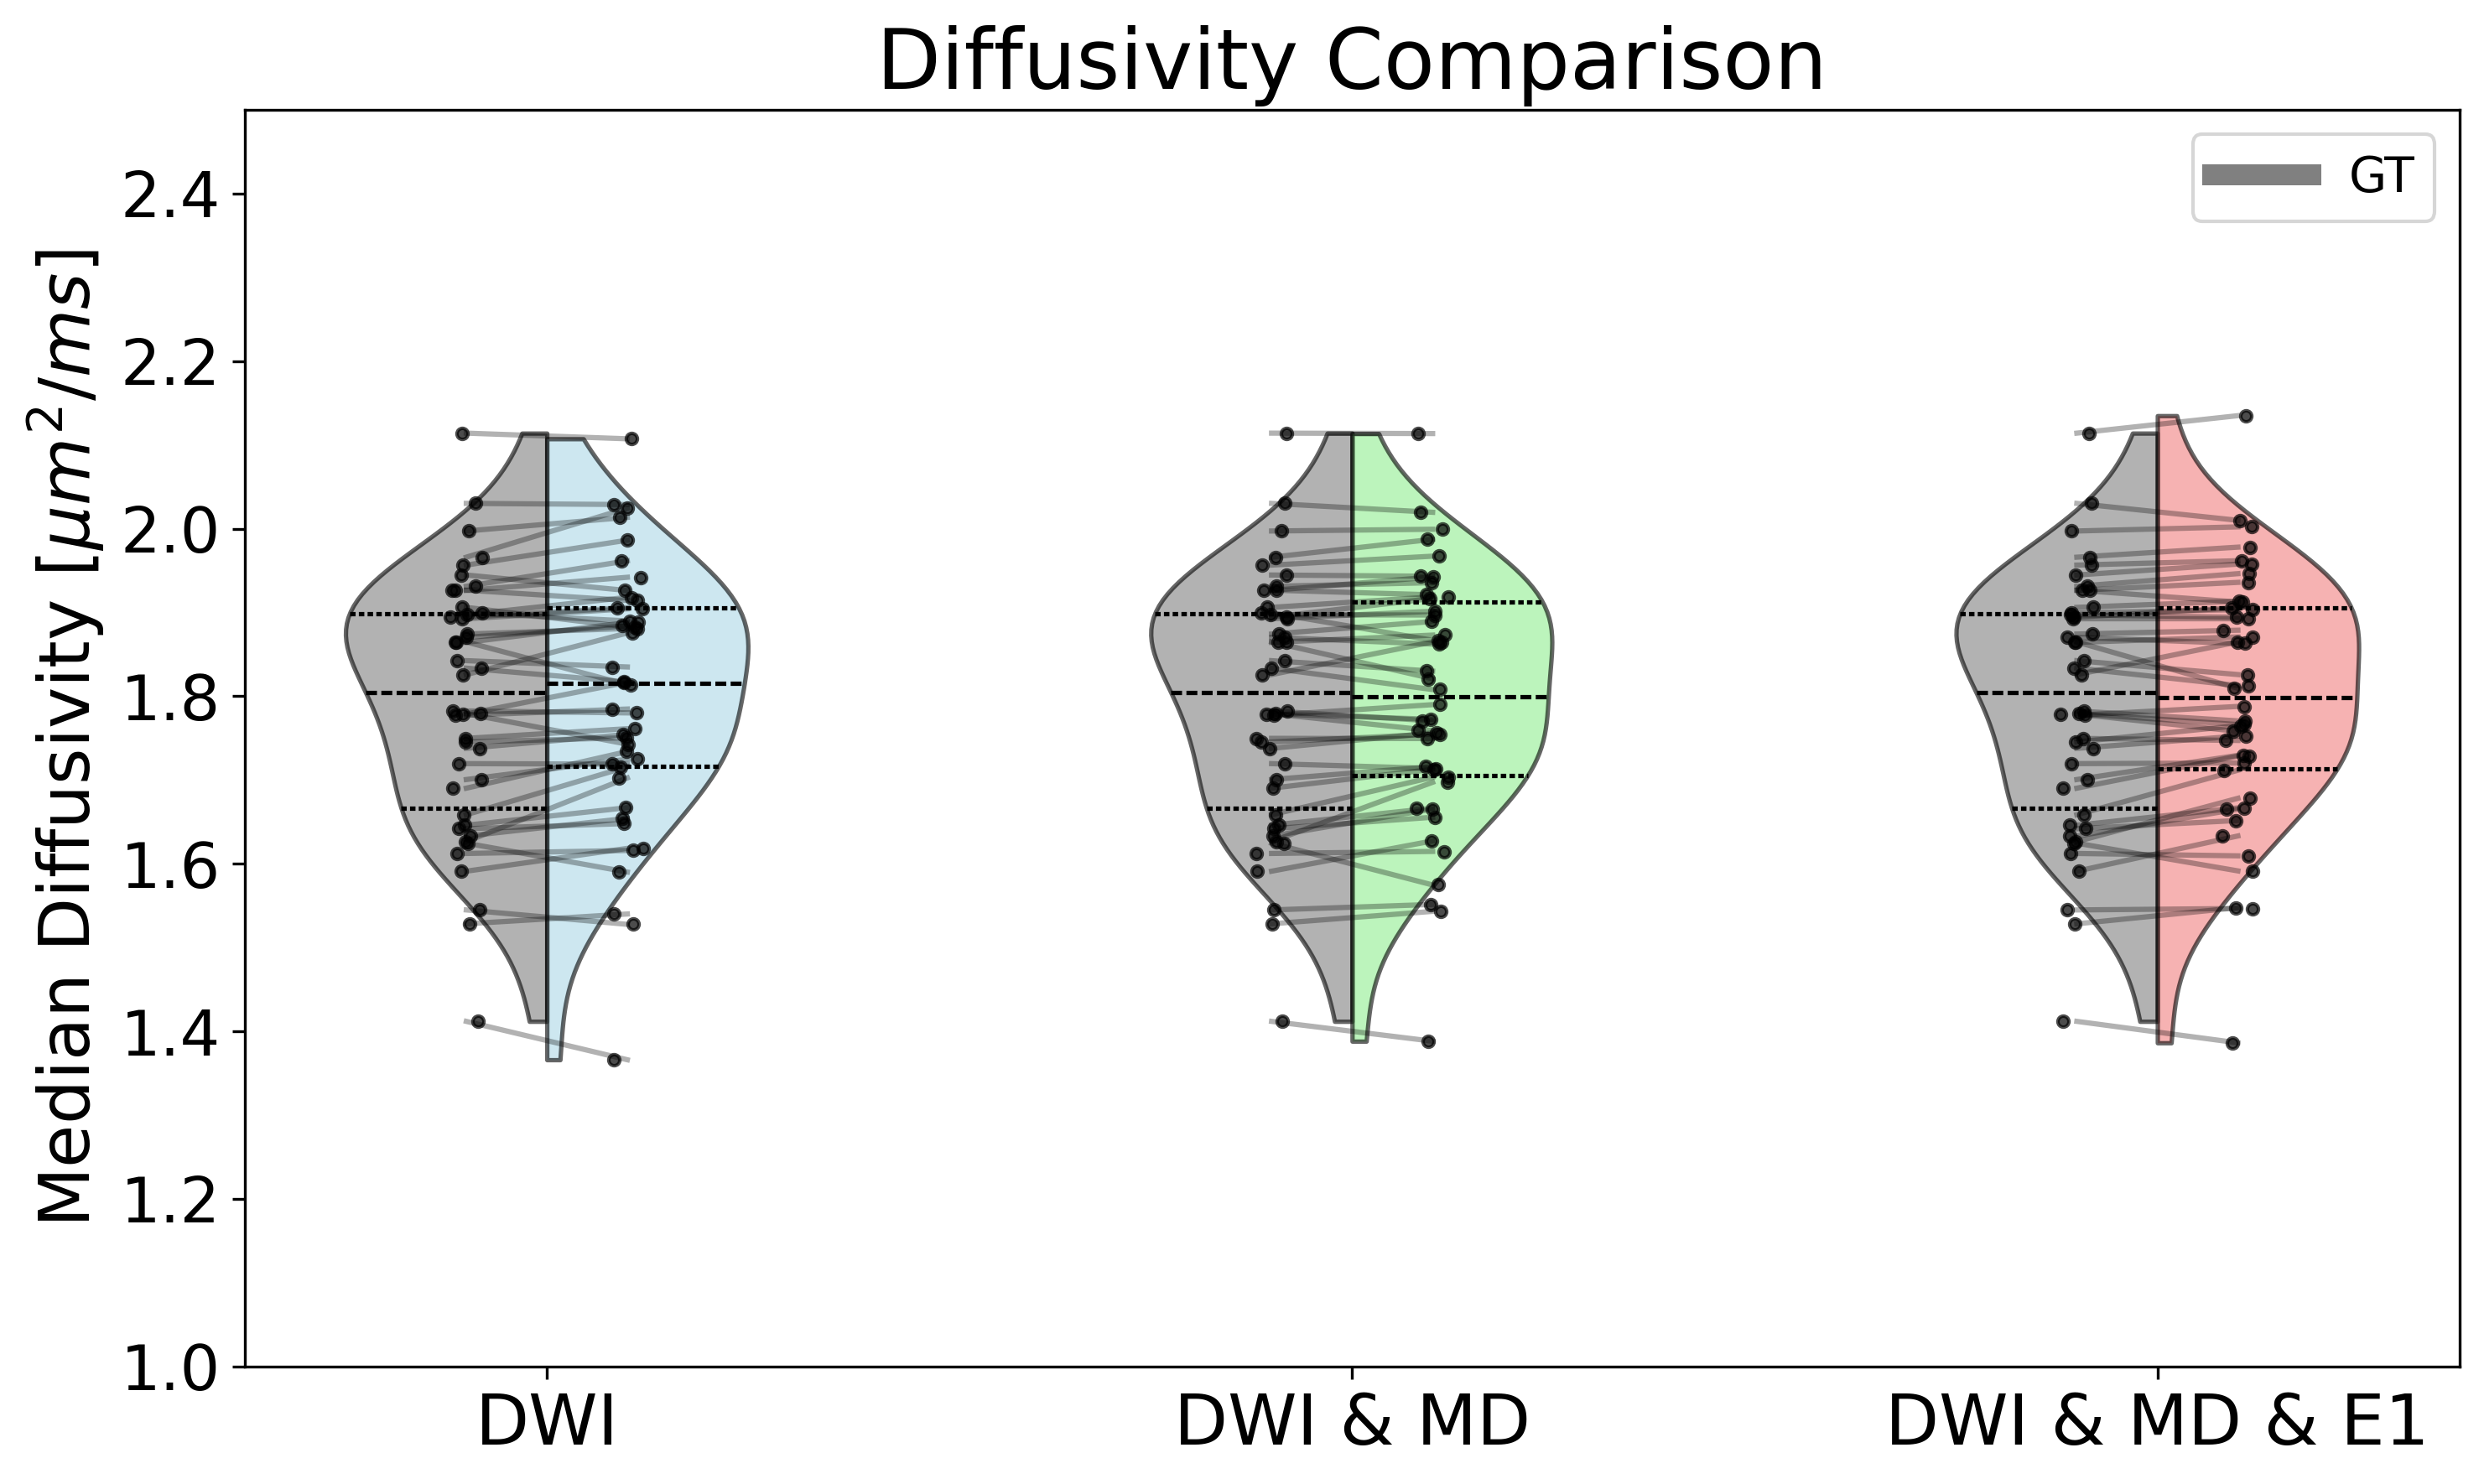

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Define the datasets
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_casemedian.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)

    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Reshape the DataFrame to have 'GT_Median' and 'Pred_median' in a single 'Median' column
    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Label', 'Dice Score', 'Dataset'],
        value_vars=['GT_Median', 'Pred_median'],
        var_name='Type',
        value_name='Median'
    )

    # Map 'GT_Median' and 'Pred_median' to 'GT' and 'Pred' in 'Type' column
    df_melted['Type'] = df_melted['Type'].replace({'GT_Median': 'GT', 'Pred_median': 'Pred'})

    # Append to the list
    all_data.append(df_melted)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define colors for GT and specific colors for each dataset's Pred
pred_colors = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}
palette = {'GT': 'grey', 'Pred': 'black'}  # Set general palette for split

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Diffusivity Comparison', fontsize=24)

# Draw the split violin plot with dataset-specific colors for Pred side
sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    split=True,
    inner='quartile',
    palette=palette,
    cut=0,
    width=0.5
)

# Customize the violin colors to match dataset-specific colors for Pred side
for idx, dataset in enumerate(pred_colors):
    # Get all patches (each violin has two parts, one for GT and one for Pred)
    for patch in plt.gca().collections[2*idx:2*idx+2]:  # 2*idx and 2*idx+1 for each split
        # Apply grey color to the left (GT) and dataset-specific color to the right (Pred)
        patch.set_facecolor('grey' if patch.get_paths()[0].vertices[:, 0].min() < idx else pred_colors[dataset])
        patch.set_edgecolor('black')  # Ensure the edge is black
        patch.set_alpha(0.6)

# Overlay individual data points without color
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    
    # Plot GT data points
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    plt.scatter(
        np.full(len(data_gt), idx - 0.1 + np.random.uniform(-0.02, 0.02, size=len(data_gt))),
        data_gt,
        color='black',
        s=10,
        alpha=0.7
    )
    
    # Plot Pred data points
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    plt.scatter(
        np.full(len(data_pred), idx + 0.1 + np.random.uniform(-0.02, 0.02, size=len(data_pred))),
        data_pred,
        color='black',
        s=10,
        alpha=0.7
    )
    
    # Draw connection lines for each paired GT-Pred data point
    for gt, pred in zip(data_gt, data_pred):
        plt.plot([idx - 0.1, idx + 0.1], [gt, pred], color='black', alpha=0.3)

# Set labels and ticks
plt.xticks(fontsize=20)
plt.ylabel('Median Diffusivity [$μm^2 / ms$]', fontsize=20)
plt.xlabel('')
plt.ylim(1, 2.5)  # Adjust based on your data range
plt.yticks(fontsize=18)
plt.tight_layout()

# Custom legend to include specific Pred colors per dataset
legend_elements = [
    Line2D([0], [0], color='grey', lw=6, label='GT'),
]
plt.legend(handles=legend_elements, fontsize=14)

plt.show()


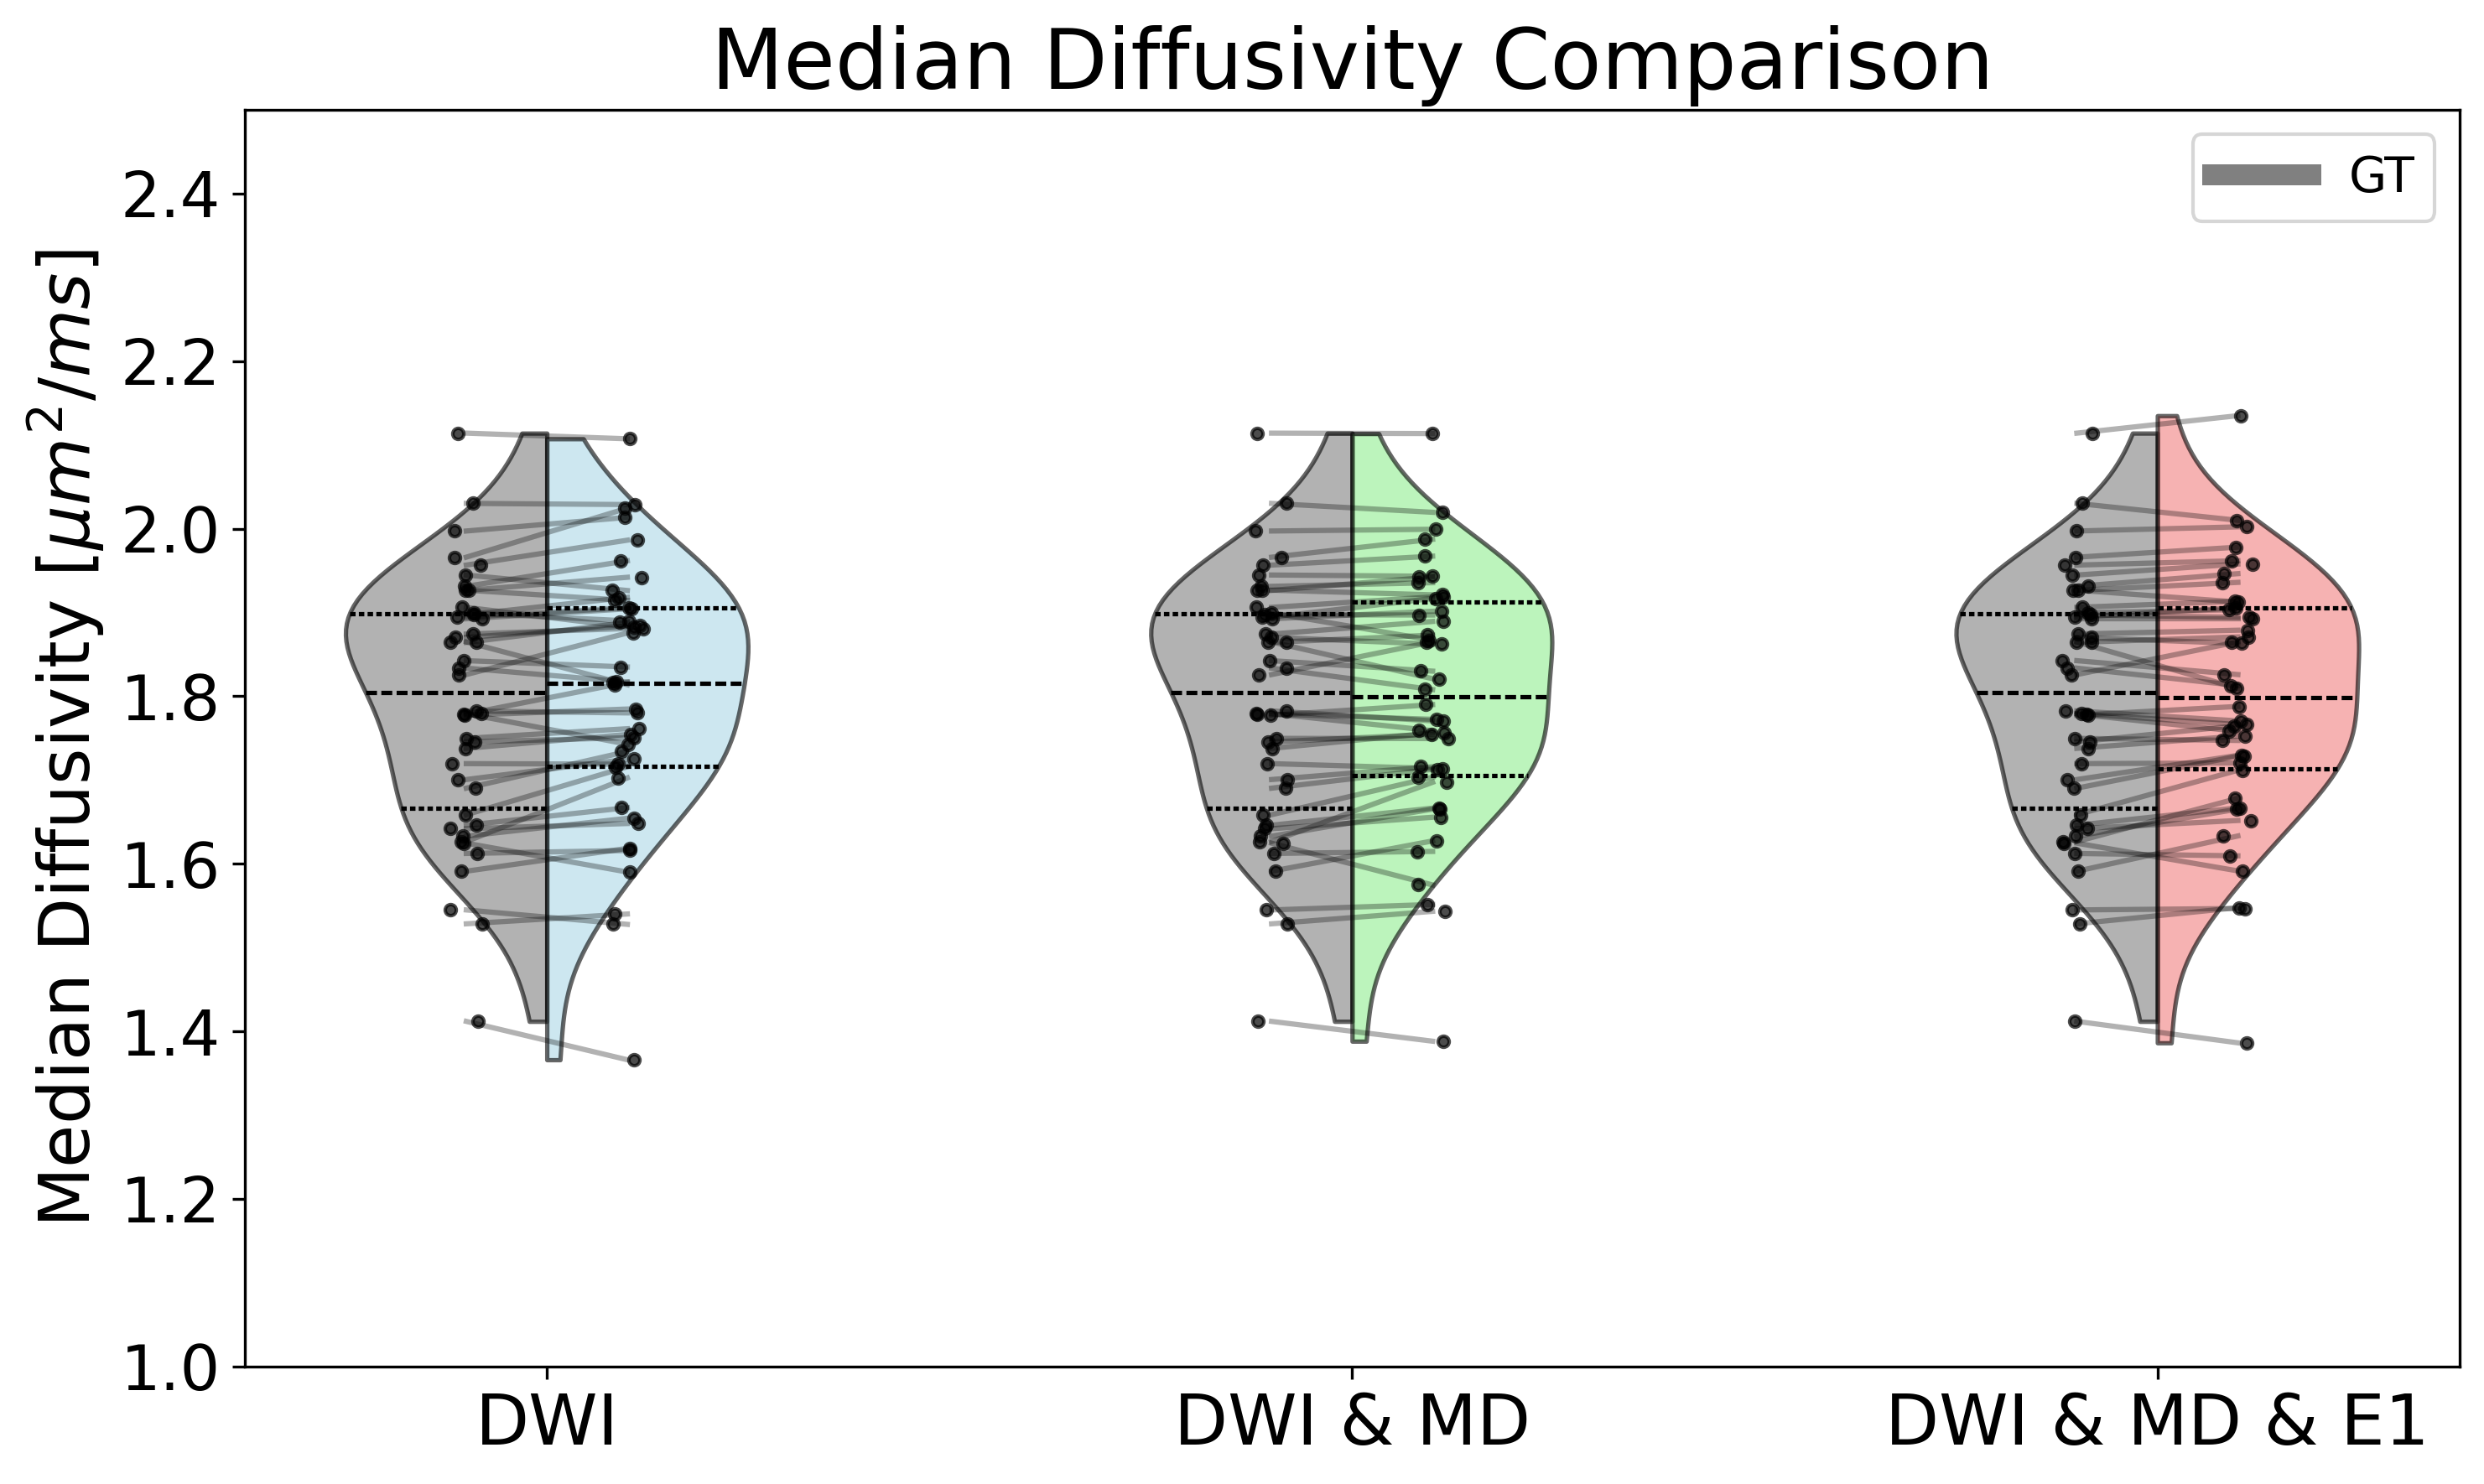

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Define the datasets
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_casemedian.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)

    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Reshape the DataFrame to have 'GT_Median' and 'Pred_median' in a single 'Median' column
    df_melted = pd.melt(
        df,
        id_vars=['Case ID', 'Label', 'Dice Score', 'Dataset'],
        value_vars=['GT_Median', 'Pred_median'],
        var_name='Type',
        value_name='Median'
    )

    # Map 'GT_Median' and 'Pred_median' to 'GT' and 'Pred' in 'Type' column
    df_melted['Type'] = df_melted['Type'].replace({'GT_Median': 'GT', 'Pred_median': 'Pred'})

    # Append to the list
    all_data.append(df_melted)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define colors for GT and specific colors for each dataset's Pred
pred_colors = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}
palette = {'GT': 'grey', 'Pred': 'black'}  # Set general palette for split

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Median Diffusivity Comparison', fontsize=24)

# Draw the split violin plot with dataset-specific colors for Pred side
sns.violinplot(
    x='Dataset',
    y='Median',
    hue='Type',
    data=combined_df,
    split=True,
    inner='quartile',
    palette=palette,
    cut=0,
    width=0.5
)

# Customize the violin colors to match dataset-specific colors for Pred side
for idx, dataset in enumerate(pred_colors):
    # Get all patches (each violin has two parts, one for GT and one for Pred)
    for patch in plt.gca().collections[2*idx:2*idx+2]:  # 2*idx and 2*idx+1 for each split
        # Apply grey color to the left (GT) and dataset-specific color to the right (Pred)
        patch.set_facecolor('grey' if patch.get_paths()[0].vertices[:, 0].min() < idx else pred_colors[dataset])
        patch.set_edgecolor('black')  # Ensure the edge is black
        patch.set_alpha(0.6)

# Overlay individual data points with consistent jitter for GT
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    
    # Plot GT data points with fixed jitter
    data_gt = df_dataset[df_dataset['Type'] == 'GT']['Median'].values
    fixed_jitter = np.random.uniform(-0.02, 0.02, len(data_gt))  # Generate fixed jitter per dataset
    plt.scatter(
        np.full(len(data_gt), idx - 0.1) + fixed_jitter,  # Apply fixed jitter
        data_gt,
        color='black',
        s=10,
        alpha=0.7
    )
    
    # Plot Pred data points with random jitter
    data_pred = df_dataset[df_dataset['Type'] == 'Pred']['Median'].values
    plt.scatter(
        np.full(len(data_pred), idx + 0.1) + np.random.uniform(-0.02, 0.02, size=len(data_pred)),
        data_pred,
        color='black',
        s=10,
        alpha=0.7
    )
    
    # Draw connection lines for each paired GT-Pred data point
    for gt, pred in zip(data_gt, data_pred):
        plt.plot([idx - 0.1, idx + 0.1], [gt, pred], color='black', alpha=0.3)

# Set labels and ticks
plt.xticks(fontsize=20)
plt.ylabel('Median Diffusivity [$μm^2 / ms$]', fontsize=20)
plt.xlabel('')
plt.ylim(1, 2.5)  # Adjust based on your data range
plt.yticks(fontsize=18)
plt.tight_layout()

# Custom legend to include specific Pred colors per dataset
legend_elements = [
    Line2D([0], [0], color='grey', lw=6, label='GT'),
]
plt.legend(handles=legend_elements, fontsize=14)

plt.show()


In [14]:
import pandas as pd
from scipy.stats import ttest_ind
main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'

# Define paths to your CSV files for the three datasets
csv_files = {
    'DWI': f'{main}/Run11/dice_scores_per_casemedian.csv',
    'DWI & MD': f'{main}/Run12/dice_scores_per_casemedian.csv',
    'DWI & MD & E1': f'{main}/Run13/dice_scores_per_casemedian.csv'
}

# Initialize a dictionary to store t-test results
t_test_results = {}

# Process each dataset and perform t-test
for dataset_name, file_path in csv_files.items():
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Filter for 'Label 1' data
    df = df[df['Label'] == 'Label 1']

    # Extract GT and Pred median values
    gt_values = df['GT_Median'].values
    pred_values = df['Pred_median'].values

    # Perform the t-test
    t_stat, p_value = ttest_ind(gt_values, pred_values, equal_var=False)
    t_test_results[dataset_name] = {"t-statistic": t_stat, "p-value": p_value}

# Print the t-test results for each dataset
for dataset, results in t_test_results.items():
    print(f"{dataset} - t-statistic: {results['t-statistic']:.4f}, p-value: {results['p-value']:.4f}")


DWI - t-statistic: -0.2671, p-value: 0.7901
DWI & MD - t-statistic: -0.1605, p-value: 0.8729
DWI & MD & E1 - t-statistic: -0.1805, p-value: 0.8572
